In [24]:
import os
import py3Dmol
import matplotlib.pyplot as plt

6t1z and 4ja4 showed no change when s=s*0
run failed when z=z*0: "Particle coordinate is nan"
6t1z no modifications has a longer tail and new connection that the target (or AF2 prediction) doesn't have. Likely due to the shallow MSA


In [1]:
def plot_pdb(filename):
    print(filename)
    with open(filename) as ifile:
        system = "".join([x for x in ifile])
    view = py3Dmol.view(width=400, height=300)
    view.addModelsAsFrames(system)
    view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
    view.zoomTo()
    view.show()

In [2]:

def filenames():
    for run_pdb in os.listdir('output'):
        if run_pdb[-1] == "b": print(run_pdb)

7MZZ_mult_0.1_s_prediction.pdb
5D3W_noise_1e-05_s_prediction.pdb
7MZZ_noise_1e-06_s_prediction.pdb
5D3W_mult_100000.0_m_prediction.pdb
7MZZ_mult_10.0_z_prediction.pdb
7MZZ_zero_1.0_s_prediction.pdb
7MZZ_noise_0.0001_s_prediction.pdb
7MZZ_mult_100000.0_s_prediction.pdb
5D3W_noise_100.0_s_prediction.pdb
7MZZ_noise_10.0_z_prediction.pdb
7MZZ_mult_0.0001_m_prediction.pdb
5D3W_noise_1000.0_m_prediction.pdb
5D3W_noise_0.01_m_prediction.pdb
7MZZ_mult_10000.0_z_prediction.pdb
7MZZ_noise_100000.0_z_prediction.pdb
7MZZ_noise_10000.0_z_prediction.pdb
5D3W_mult_0.001_m_prediction.pdb
5D3W_noise_10000.0_m_prediction.pdb
7MZZ_noise_0.001_m_prediction.pdb
7MZZ_noise_10.0_s_prediction.pdb
7MZZ_noise_100000.0_s_prediction.pdb
7MZZ_noise_10000.0_s_prediction.pdb
5D3W_mult_1000.0_m_prediction.pdb
7MZZ_mult_10000.0_s_prediction.pdb
7MZZ_noise_1e-06_z_prediction.pdb
5D3W_none_1.0_s_prediction.pdb
7MZZ_mult_10.0_s_prediction.pdb
7MZZ_mult_1e-05_m_prediction.pdb
7MZZ_mult_0.1_z_prediction.pdb
5D3W_noise_1e-0

In [3]:
def tmscore(target, modified):
    tmscore = -1
    os.system(f"./tmscore/TMscore {target} {modified} >> tmscore_temp_output")
    with open("tmscore_temp_output") as f:
        for line in f:
            if line.startswith("TM-score"):
                tmscore = float(line.split('=')[1].strip().split(' ')[0])
    os.system("rm tmscore_temp_output")
    return tmscore

In [19]:
def tmscore_dict(directory,target_pdbs):
    dict = {}
    for run_pdb in os.listdir('output'):
        if run_pdb[-1] == "b":
            target_pdb = ''
            for possible_target_pdb in target_pdbs:
                if run_pdb[0:3] == possible_target_pdb[0:3]:
                    target_pdb = possible_target_pdb
            parsed_name = run_pdb.split('_')
            dict[run_pdb] = {}
            dict[run_pdb]['protien'] = parsed_name[0]
            dict[run_pdb]['mode'] = parsed_name[1]
            dict[run_pdb]['value'] = float(parsed_name[2])
            dict[run_pdb]['rep'] = parsed_name[3]
            dict[run_pdb]['tmscore'] = tmscore(directory + target_pdb, directory + run_pdb)
    return dict

d = tmscore_dict('output/',['7MZZ_none_1.0_s_prediction.pdb','5D3W_none_1.0_s_prediction.pdb'])

In [28]:
def plot_tmruns(dict,protien,mode,rep,color,marker):
    legend_marker = True
    for run_pdb in dict:
        if dict[run_pdb]['protien'] == protien and dict[run_pdb]['mode'] == mode and dict[run_pdb]['rep'] == rep:
            plt.scatter(dict[run_pdb]['value'],dict[run_pdb]['tmscore'],color=color,marker=marker,label=dict[run_pdb]['protien'] if legend_marker else '')
            legend_marker = False


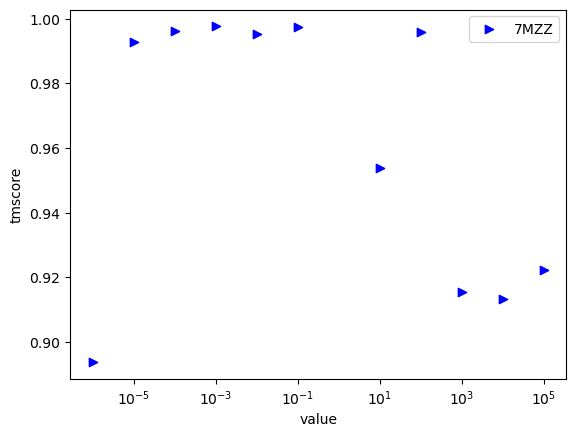

In [29]:
plot_tmruns(d,'7MZZ','mult','s','blue','>')
plt.legend()
plt.xscale('log')
plt.xlabel('value')
plt.ylabel('tmscore')
plt.title('')
plt.show()

In [16]:
tmscore('output/7MZZ_mult_0.1_s_prediction.pdb','output/7MZZ_none_1.0_s_prediction.pdb')

0.9973

In [10]:
plot_pdb("output/5D3W_noise_1e-05_s_prediction.pdb")
tmscore('output/5D3W_none_1.0_s_prediction.pdb','output/5D3W_noise_1e-05_s_prediction.pdb')

output/5D3W_noise_1e-05_s_prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

0.9957

In [11]:
#plot_pdb("target/4ja4.pdb")
plot_pdb("../output/4JA4_s_equal_0_4JA4__prediction.pdb")
plot_pdb("../output/4JA4_computed_NO_MODS_4JA4__prediction.pdb")
plot_pdb("../output/4JA4_vari_s_100__prediction.pdb")


../output/4JA4_s_equal_0_4JA4__prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

../output/4JA4_computed_NO_MODS_4JA4__prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

../output/4JA4_vari_s_100__prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [57]:
plot_pdb("target/6t1z.pdb")
plot_pdb("computed/6t1z_c.pdb")
plot_pdb("../output/computed_NO_MODS__prediction.pdb")
plot_pdb("../output/s_0tensor_prediction.pdb")
plot_pdb("target/AF-Q9CDQ3-F1-model_v4.pdb")

target/6t1z.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

computed/6t1z_c.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

../output/computed_NO_MODS__prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

../output/s_0tensor_prediction.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

target/AF-Q9CDQ3-F1-model_v4.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [60]:
filename = "../output/s_0tensor_prediction.pdb"
print(filename)
with open(filename) as ifile:
    system = "".join([x for x in ifile])
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()

filename = "target/AF-Q9CDQ3-F1-model_v4.pdb"
print(filename)
with open(filename) as ifile:
    system = "".join([x for x in ifile])
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view.zoomTo()


view.show()

../output/s_0tensor_prediction.pdb
target/AF-Q9CDQ3-F1-model_v4.pdb


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# S Tensor testing

In [27]:
import torch

In [30]:
s = torch.load('../output/s_tensor', map_location=torch.device('cpu'))

In [32]:
s.size()

torch.Size([485, 384])

In [38]:
s.numpy()

array([[ 45.927208  ,   8.0084305 ,  79.990395  , ...,   1.4889581 ,
         36.340336  ,   9.253159  ],
       [ 13.862104  ,  56.226234  , 113.1229    , ..., -15.1566    ,
          1.441015  ,  -5.2273397 ],
       [-17.80974   ,  -2.041065  ,  82.25283   , ..., -59.80824   ,
         17.102962  ,  15.574449  ],
       ...,
       [-55.20512   ,  27.168255  , 126.421486  , ...,   4.9150863 ,
          8.800816  ,  35.557907  ],
       [-47.27574   ,  24.962852  , 112.51609   , ...,  -0.16669267,
         17.113813  ,  40.031548  ],
       [ 19.559338  ,  -2.1780274 ,  51.314327  , ..., -38.42718   ,
          0.4422743 ,  11.522031  ]], dtype=float32)

In [34]:
import matplotlib.pyplot as plt

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [44]:
s_pca = pca.fit_transform(s)

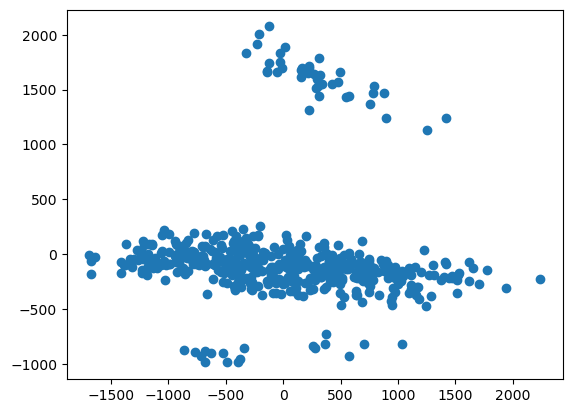

In [52]:
plt.scatter(s_pca[:,0], s_pca[:,1])